# Applying PCA in SVM based on insights from ensemble learning

 Important Feature indexes in the ensemble 
' 0 ' - 0.00956205775482884
' 6 ' - 0.028560080195192083
' 7 ' - 0.032271944922547334
' 12 ' - 0.020536692223439214
' 17 ' - 0.01961308437212052
' 20 ' - 0.019458453193392955
' 24 ' - 0.01323977227591685
' 31 ' - 0.02680273764611114
' 33 ' - 0.00956205775482884
' 37 ' - 0.012550200803212853
' 39 ' - 0.043254937833251135
' 40 ' - 0.08839799480464322
' 41 ' - 0.17227026784039356
' 42 ' - 0.13616303432761198
' 43 ' - 0.146597642417923
' 44 ' - 0.1432137829664364
' 45 ' - 0.07794525866815022


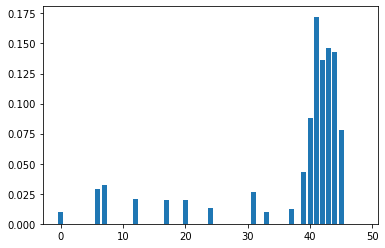

In [1]:
import pickle
import pandas as pd 
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

with open('models/soft_ensemble.pkl', 'rb') as f:
    clf = pickle.load(f)

imp_featuresInd = []
for model in clf.estimators_:
    if model.__class__.__name__ == 'DecisionTreeClassifier':
        importance = model.feature_importances_
        print("\033[1m Important Feature indexes in the ensemble \033[0m")
        for i in range(len(importance)):
            if importance[i] != 0: 
                print ("'",i,"'", end = " - ")
                print (importance[i])
                imp_featuresInd.append(i)
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()

### Important Features

In [2]:
data = pd.read_csv("./data/cleveland_final.csv")
imp_features = data.iloc[:, imp_featuresInd]
print(imp_features.shape)
imp_features.describe()

(282, 17)


,age,cigs,years,ekgmo,nitr,thaldur,thalrest,oldpeak,rldv5e,cday,num,lmt,ladprox,laddist,cxmain,om1,rcaprox
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,16.460993,14.829787,6.404255,0.180851,8.418440,75.117021,1.026950,123.585106,15.347518,0.907801,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759
std,9.053083,19.580300,15.564563,3.790752,0.888392,2.590569,13.795809,1.138825,46.783839,8.830541,1.224894,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576
min,29.000000,-9.000000,-9.000000,1.000000,-9.000000,1.800000,40.000000,0.000000,24.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,48.000000,0.000000,0.000000,3.000000,0.000000,6.500000,65.000000,0.000000,92.000000,8.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,10.000000,15.000000,7.000000,0.000000,8.500000,74.000000,0.800000,118.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,61.000000,30.000000,30.000000,10.000000,0.000000,10.075000,84.000000,1.600000,152.750000,22.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,77.000000,99.000000,54.000000,12.000000,1.000000,15.000000,119.000000,6.200000,270.000000,31.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### PCA candidates 

In [3]:
pcaCandidates = data.drop(imp_features.columns, axis=1)
pcaCandidates.describe()

,sex,cp,trestbps,htn,chol,fbs,dm,famhist,restecg,ekgday,...,xhypo,slope,ca,thal,cmo,cyr,rcadist,lvx3,lvx4,lvf
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.00000
mean,0.677305,3.163121,131.563830,0.617021,249.092199,0.148936,-8.184397,0.620567,1.014184,15.223404,...,0.021277,1.585106,0.595745,4.581560,6.400709,82.304965,1.127660,1.134752,1.411348,1.14539
std,0.468338,0.955405,17.757496,0.486977,51.217546,0.356658,2.741802,0.486108,0.998118,8.686089,...,0.144561,0.609700,1.236910,2.248467,3.744376,0.957780,0.334304,0.766002,1.439508,0.44257
min,0.000000,1.000000,94.000000,0.000000,126.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,-9.000000,-9.000000,1.000000,81.000000,1.000000,1.000000,1.000000,1.00000
25%,0.000000,3.000000,120.000000,0.000000,213.000000,0.000000,-9.000000,0.000000,0.000000,8.000000,...,0.000000,1.000000,0.000000,3.000000,3.000000,82.000000,1.000000,1.000000,1.000000,1.00000
50%,1.000000,3.000000,130.000000,1.000000,244.000000,0.000000,-9.000000,1.000000,2.000000,15.000000,...,0.000000,2.000000,0.000000,3.000000,7.000000,82.000000,1.000000,1.000000,1.000000,1.00000
75%,1.000000,4.000000,140.000000,1.000000,277.000000,0.000000,-9.000000,1.000000,2.000000,22.000000,...,0.000000,2.000000,1.000000,7.000000,10.000000,83.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,4.000000,200.000000,1.000000,564.000000,1.000000,1.000000,1.000000,2.000000,31.000000,...,1.000000,3.000000,3.000000,7.000000,12.000000,84.000000,2.000000,8.000000,8.000000,4.00000


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

(282, 3)


/mnt/c/Users/meivenkatkumar/fyp/fyp1/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,pca1,pca2,pca3
count,282.000000,282.000000,282.000000
mean,-282.769745,-260.058066,94.639238
std,1.064947,1.623220,1.163242
min,-285.142415,-264.031279,92.290595
25%,-283.510350,-261.056008,93.789752
50%,-282.828437,-260.130861,94.600458
75%,-282.133080,-259.111008,95.401672
max,-276.762445,-255.378829,97.846397


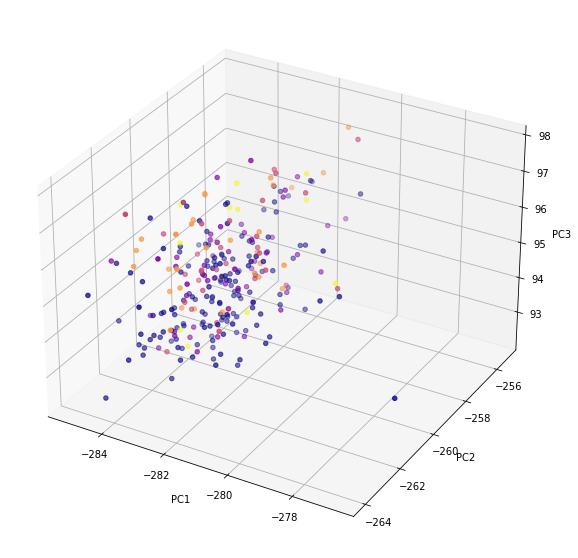

In [5]:
scaling=StandardScaler()
 
scaling.fit(pcaCandidates)
Scaled_data=scaling.transform(pcaCandidates)
 

principal=PCA(n_components=3)
principal.fit(pcaCandidates)
# principal.fit(Scaled_data)
postPCA=principal.transform(Scaled_data)

print(postPCA.shape)

fig = pyplot.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(postPCA[:,0], postPCA[:,1], postPCA[:,2], c=imp_features['num'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

postPCA = pd.DataFrame(postPCA, columns=['pca1', 'pca2', 'pca3'])
postPCA.describe()

### Analysis

It is visible these columns have least contribution towards the classification objective

In [6]:
data =  pd.concat([imp_features, postPCA], axis=1)
print(data.shape)
data.describe()

(282, 20)


,age,cigs,years,ekgmo,nitr,thaldur,thalrest,oldpeak,rldv5e,cday,num,lmt,ladprox,laddist,cxmain,om1,rcaprox,pca1,pca2,pca3
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,16.460993,14.829787,6.404255,0.180851,8.418440,75.117021,1.026950,123.585106,15.347518,0.907801,1.042553,1.141844,1.205674,1.156028,1.163121,1.173759,-282.769745,-260.058066,94.639238
std,9.053083,19.580300,15.564563,3.790752,0.888392,2.590569,13.795809,1.138825,46.783839,8.830541,1.224894,0.202206,0.349510,0.404912,0.363527,0.370132,0.379576,1.064947,1.623220,1.163242
min,29.000000,-9.000000,-9.000000,1.000000,-9.000000,1.800000,40.000000,0.000000,24.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-285.142415,-264.031279,92.290595
25%,48.000000,0.000000,0.000000,3.000000,0.000000,6.500000,65.000000,0.000000,92.000000,8.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-283.510350,-261.056008,93.789752
50%,55.000000,10.000000,15.000000,7.000000,0.000000,8.500000,74.000000,0.800000,118.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-282.828437,-260.130861,94.600458
75%,61.000000,30.000000,30.000000,10.000000,0.000000,10.075000,84.000000,1.600000,152.750000,22.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-282.133080,-259.111008,95.401672
max,77.000000,99.000000,54.000000,12.000000,1.000000,15.000000,119.000000,6.200000,270.000000,31.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-276.762445,-255.378829,97.846397


In [7]:
y = data.num.values
x = data.drop(["num"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (197, 19)
x_test (85, 19)
y_train (197,)
y_test (85,)


In [8]:
param_grid = [{'kernel': ['linear'], 'C': [100, 10, 1.0, 0.1, 0.01, 0.001]}, 
              {'kernel': ['poly'], 'gamma': [0.01, 0.001, 0.0001], 'C': [100, 10, 1.0, 0.1, 0.01, 0.001]}, 
              {'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001], 'C': [100, 10, 1.0, 0.1, 0.01, 0.001]},
              {'kernel': ['sigmoid'], 'gamma': [0.01, 0.001, 0.0001]}
             ]

from sklearn.metrics import precision_score, make_scorer, recall_score


precision_scorer = make_scorer(precision_score, zero_division=0, average='macro')
# recall_scorer = make_scorer(recall_score, average='macro')

scores = ['precision', 'accuracy', 'f1', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    if score == 'precision':
        clf = GridSearchCV(SVC(), param_grid, scoring=precision_scorer, cv=StratifiedKFold(n_splits=6), refit = 'accuracy')  
    elif score == 'accuracy':
        clf = GridSearchCV(SVC(), param_grid, scoring=score, cv=StratifiedKFold(n_splits=6), refit = 'accuracy')
    else: 
        clf = GridSearchCV(SVC(), param_grid, scoring ='%s_macro' %score, cv=StratifiedKFold(n_splits=6), refit = 'accuracy')
        
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']          
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#          print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision
Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.53      0.77      0.62        13
           2       0.12      0.14      0.13         7
           3       0.40      0.31      0.35        13
           4       1.00      0.20      0.33         5

    accuracy                           0.72        85
   macro avg       0.60      0.48      0.48        85
weighted avg       0.74      0.72      0.71        85


# Tuning hyper-parameters for accuracy
Best parameters set found on development set:

{'C': 1.0, 'kernel': 'linear'}

Grid scores on development set:


Detailed classification report:

The model is trained on the full dev

## 76% Post PCA feedback accuracy for SVM

In [9]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier 

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# create the sub models
estimatorsh = []
estimatorss = []
model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorsh.append(('svm', model2))
estimatorsh.append(('dt', model1))
estimatorsh.append(('abc', model3))


model1 = DecisionTreeClassifier()
model2 = SVC(kernel= 'linear', C=1, probability=True)
model3 = AdaBoostClassifier(n_estimators=300)

estimatorss.append(('svm', model2))
estimatorss.append(('dt', model1))
estimatorss.append(('abc', model3))


# create the ensemble model
hensemble = VotingClassifier(estimatorsh, voting ='hard')
sensemble = VotingClassifier(estimatorss, voting ='soft')

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       0.50      0.92      0.65        13
           2       0.00      0.00      0.00         7
           3       1.00      0.38      0.56        13
           4       1.00      0.80      0.89         5

    accuracy                           0.80        85
   macro avg       0.69      0.62      0.61        85
weighted avg       0.81      0.80      0.77        85



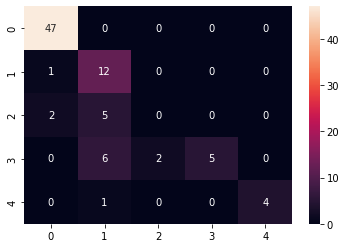

In [10]:
hensemble.fit(x_train, y_train)
y_pred = hensemble.predict(x_test)
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.76      1.00      0.87        13
           2       0.64      1.00      0.78         7
           3       1.00      0.46      0.63        13
           4       1.00      0.80      0.89         5

    accuracy                           0.91        85
   macro avg       0.88      0.85      0.83        85
weighted avg       0.93      0.91      0.90        85



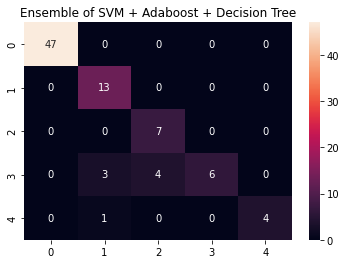

In [29]:
sensemble.fit(x_train, y_train)
y_pred = sensemble.predict(x_test)
accuracy_score(y_test, y_pred)


cm = confusion_matrix(y_test, y_pred)
pyplot.title("Ensemble of SVM + Adaboost + Decision Tree")
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

## 92% Post PCA feedback loop accuracy for ensemble